In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [2]:
data = pd.read_csv('Columbia STS-1 RS-25_log.csv')

data['Time'] = data['Time'] - data['Time'][0]

data.head()

,Time,Lat,Lng,Altitude,Dwnrg Dst,Stage,Mass,TWR,Throt,AZ(cmd),HAOA,Pitch,VAOA,Surfvel,Orbvel,Vspeed,Dwnrg surfvel,Incl,Ecctr,Unnamed: 19
0,0.00,28.60839,-80.599691,0.120393,0.000400,1,872859.49322,1.240984,100.0,91.907961,-0.068322,83.256906,6.704724,4.074167,408.364905,4.046332,0.485808,28.60839,0.997335,NaN
1,1.02,28.60839,-80.599682,0.127103,0.001184,1,872859.49322,1.241601,100.0,89.879830,0.008745,83.299251,6.673259,9.295882,409.054077,9.232933,1.079514,28.60839,0.997327,NaN
2,2.02,28.60839,-80.599669,0.138874,0.002549,1,872859.49322,1.251192,100.0,90.219105,-0.057588,83.364573,6.576272,14.527638,409.790107,14.431871,1.665320,28.60839,0.997319,NaN
3,3.02,28.60839,-80.599649,0.155901,0.004497,1,872859.49322,1.263065,100.0,90.366102,-0.030526,83.461767,6.470224,19.875858,410.592167,19.748637,2.245029,28.60839,0.997312,NaN
4,3.96,28.60839,-80.599624,0.176833,0.006850,1,872859.49322,1.274891,100.0,89.536045,0.049516,83.571859,6.332456,25.080248,411.404599,24.926163,2.775570,28.60839,0.997304,NaN


In [3]:
data.dtypes

Time             float64
Lat              float64
Lng              float64
Altitude         float64
Dwnrg Dst        float64
Stage              int64
Mass             float64
TWR              float64
Throt            float64
AZ(cmd)          float64
HAOA             float64
Pitch            float64
VAOA             float64
Surfvel          float64
Orbvel           float64
Vspeed           float64
Dwnrg surfvel    float64
Incl             float64
Ecctr            float64
Unnamed: 19      float64
dtype: object

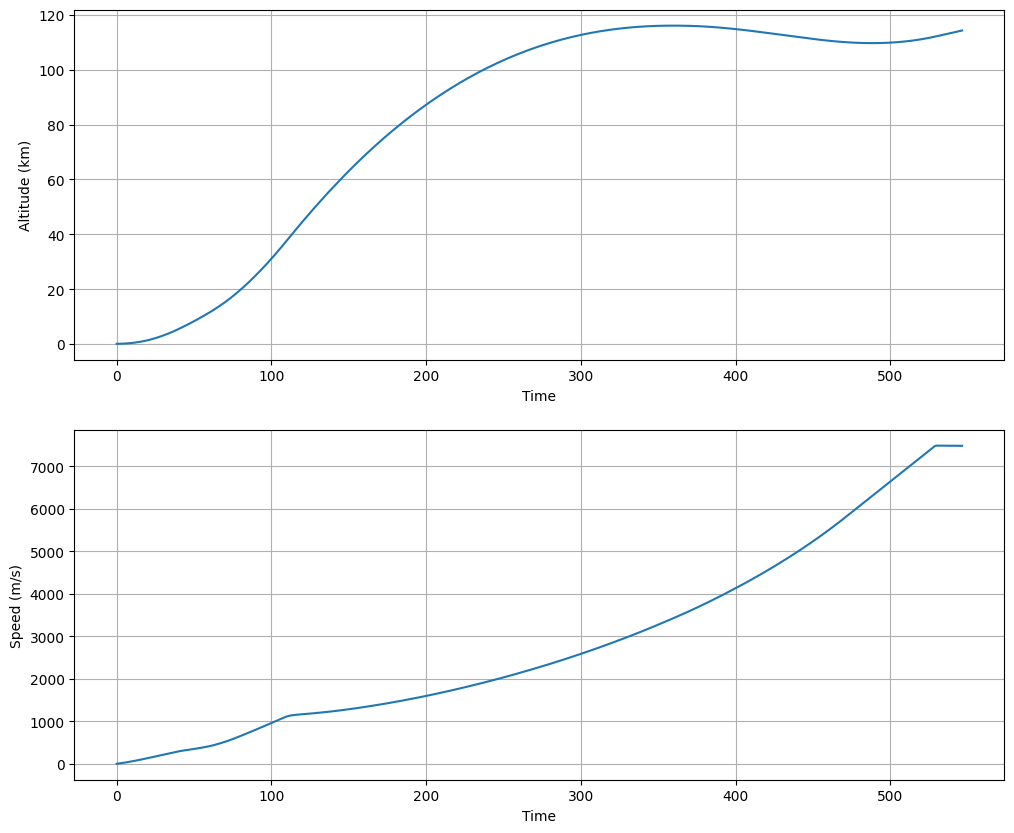

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['Time'], data['Altitude'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_ = ax[1]
plt_.plot(data['Time'], data['Surfvel'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()




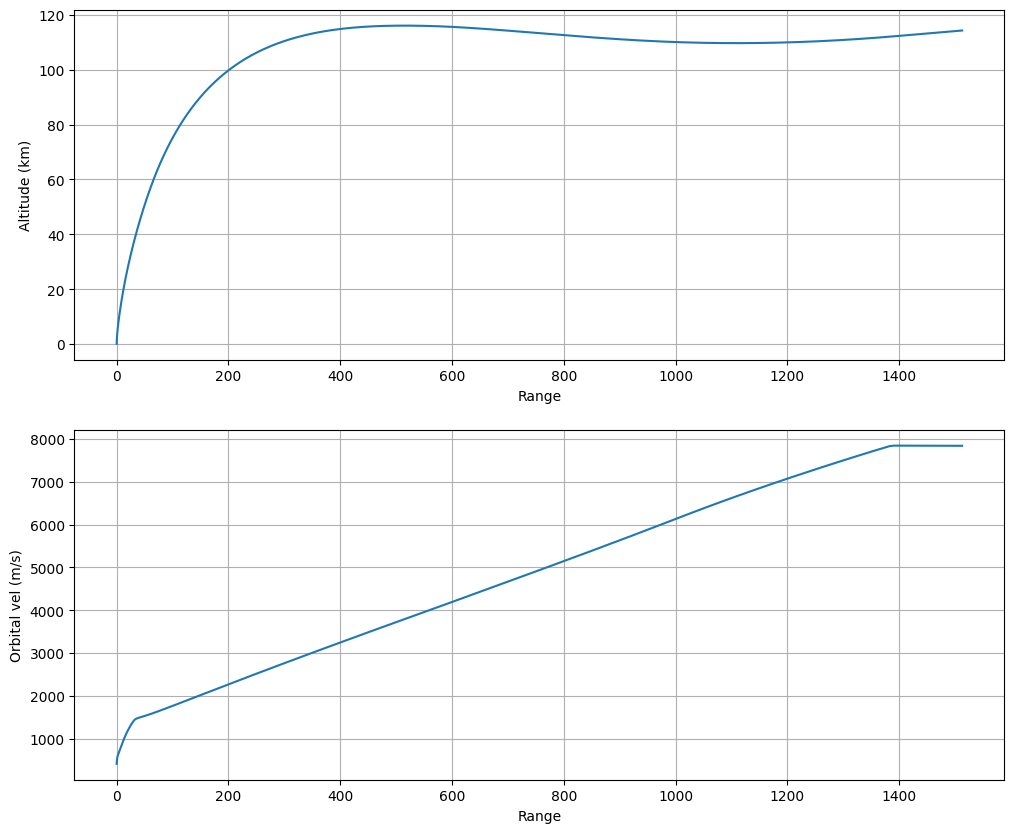

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['Dwnrg Dst'], data['Altitude'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Altitude (km)')
plt_.grid()


plt_ = ax[1]
plt_.plot(data['Dwnrg Dst'], data['Orbvel'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Orbital vel (m/s)')
plt_.grid()


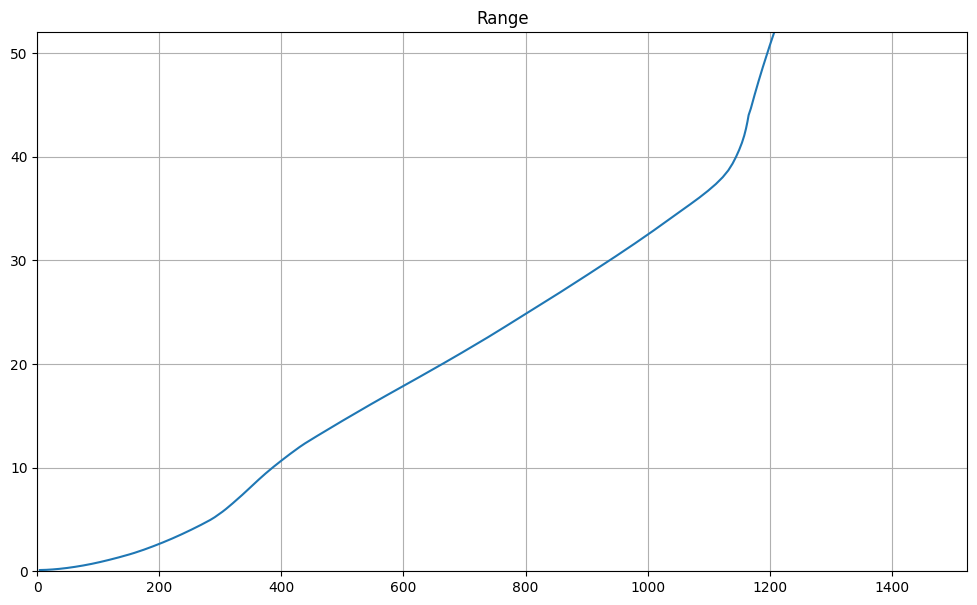

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax
plt_.plot(data['Surfvel'], data['Altitude'])
    
plt_.set_xlim([0, 1524])
plt_.set_ylim([0, 52])
    
plt_.set_title('Range')
plt_.grid()

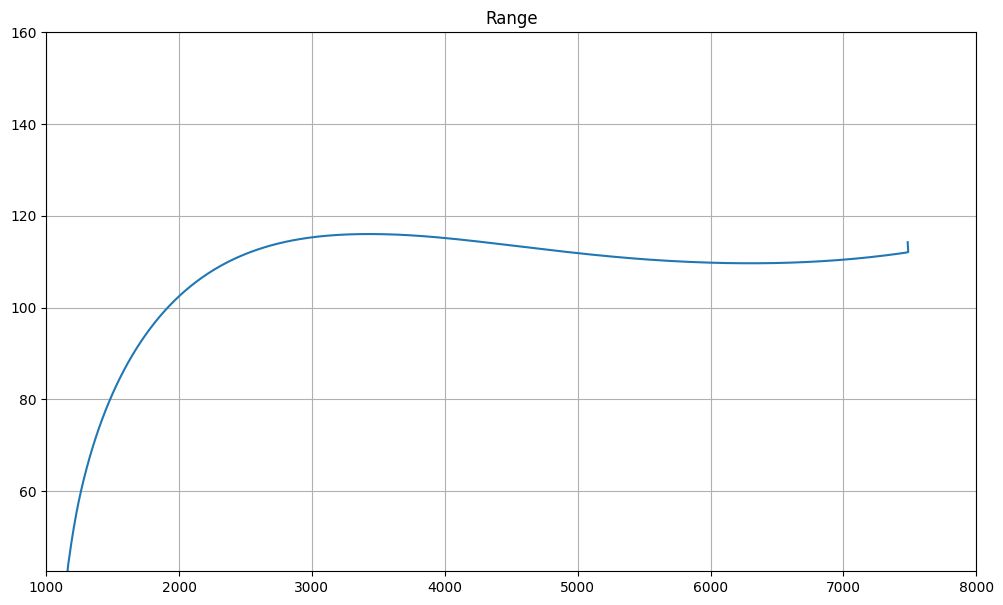

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax
plt_.plot(data['Surfvel'], data['Altitude'])
    
plt_.set_xlim([1000, 8000])
plt_.set_ylim([42.5, 160])
    
plt_.set_title('Range')
plt_.grid()

In [8]:
traj_bounds= [[0, 500], [50, 350]]

def traj_disp(n, data):
    if n==1:
        traj_lines = [
            
                    np.array([
                     [ 54.5554432,  409.6       ],
                     [ 54.525952 ,  405.98588235],
                     [100.352    ,  397.49270588],
                     [124.928    ,  382.49411765],
                     [133.12     ,  375.26588235],
                     [161.792    ,  348.70211765],
                     [178.9952   ,  335.14917647],
                     [223.232    ,  301.17647059],
                     [247.808    ,  283.10588235],
                     [272.384    ,  266.84235294],
                     [296.96     ,  246.96470588],
                     [321.536    ,  228.89411765],
                     [346.112    ,  210.82352941],
                     [370.688    ,  192.75294118],
                     [395.264    ,  174.68235294],
                     [403.456    ,  156.61176471],
                     [419.84     ,  129.50588235]
                    ])
                ]


        r_speed = (0, 1524)
        r_alt = (0, 52)

        traj_data = data[(data['Surfvel'].between(*r_speed)) & (data['Altitude'].between(*r_alt))][['Surfvel', 'Altitude']]

        traj_speed = data['Surfvel'].to_numpy()
        traj_alt = data['Altitude'].to_numpy()

        traj_x = np.array([traj_x_convert(n, r) for r in traj_speed])
        traj_y = np.array([traj_y_convert(n, v) for v in traj_alt])

        trajplot_lines(n, traj_lines, [traj_x, traj_y], traj_bounds)


    elif n==2:
        traj_lines = [
                        np.array([
                             [ 59.00190476, 393.64155844],
                             [ 70.7047619 , 345.76623377],
                             [ 90.20952381, 297.89090909],
                             [109.71428571, 273.95324675],
                             [129.21904762, 255.60103896],
                             [187.73333333, 242.03636364],
                             [226.74285714, 242.03636364],
                             [265.75238095, 246.02597403],
                             [304.76190476, 250.01558442],
                             [343.77142857, 254.00519481],
                             [382.78095238, 254.00519481],
                             [421.79047619, 252.40935065],
                             [441.2952381 , 250.01558442],
                             [456.89904762, 247.62181818]
                                 ])
                ]

        r_speed = (1524, 8000)
        r_alt = (42, 160)

        traj_data = data[(data['Orbvel'].between(*r_speed)) & (data['Altitude'].between(*r_alt))][['Orbvel', 'Altitude']]

        traj_speed = data['Orbvel'].to_numpy()
        traj_alt = data['Altitude'].to_numpy()

        traj_x = np.array([traj_x_convert(n, r) for r in traj_speed])
        traj_y = np.array([traj_y_convert(n, v) for v in traj_alt])

        trajplot_lines(n, traj_lines, [traj_x, traj_y], traj_bounds)

    

def trajplot_lines(n, lines, data, traj_bounds):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    #plt_.invert_yaxis()
    
    
    img = plt.imread("ascent_traj" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[traj_bounds[0][0], traj_bounds[0][1], traj_bounds[1][0], traj_bounds[1][1]])
    
    
    #for l in lines:
    #    line_X = np.array([rescale_traj_x(p, traj_bounds[0]) for p in l[:,0]])  
    #    line_y = np.array([rescale_traj_y(p, traj_bounds[1]) for p in l[:,1]]) 
    #    plt_.plot(line_X, line_y, 'r')
       

       
    
        
    plt1 = plt_.scatter(
                        np.array([rescale_traj_x(p, traj_bounds[0]) for p in data[0]]),
                        np.array([rescale_traj_y(p, traj_bounds[1]) for p in data[1]]),
        )
    
    
    _ = plt_.scatter(rescale_traj_x(traj_x_convert(n, 1950), traj_bounds[0]), 200)
    
    _ = plt_.scatter(rescale_traj_x(traj_x_convert(n, 4350), traj_bounds[0]), 280)
    
    plt_.set_xlim(traj_bounds[0])
    plt_.set_ylim(traj_bounds[1])
     
    plt_.grid()
        
        
def traj_x_convert(n, val):
    
    par = val * 3.28084
    
    if n==1:
        return (par / 5000.0 * 0.8 + 0.1) * 512.0;
    elif n==2:
        return ((par - 5000.0) / 21000.0 * 0.8 + 0.1) * 512.0;
        
            
def traj_y_convert(n, val):
    
    par = val * 3280.84

    if n==1:
        return 512.0 - (par / 170000.0 * 0.6 + 0.2) * 512.0;
    elif n==2:
        return 512.0 - ((par - 140000.0) / 385000.0 * 0.6 + 0.2) * 512.0;
    
#traj_bounds= [[0, 500], [50, 350]]
    
def rescale_traj_x(p, traj_bounds_x):
    out = (p - 430)/486*(traj_bounds_x[1] - traj_bounds_x[0]) + traj_bounds_x[0] 
    return p

def rescale_traj_y(p, traj_bounds_y):
    return (p - 425)/(-275)*(traj_bounds_y[1] - traj_bounds_y[0]) + traj_bounds_y[0]
    

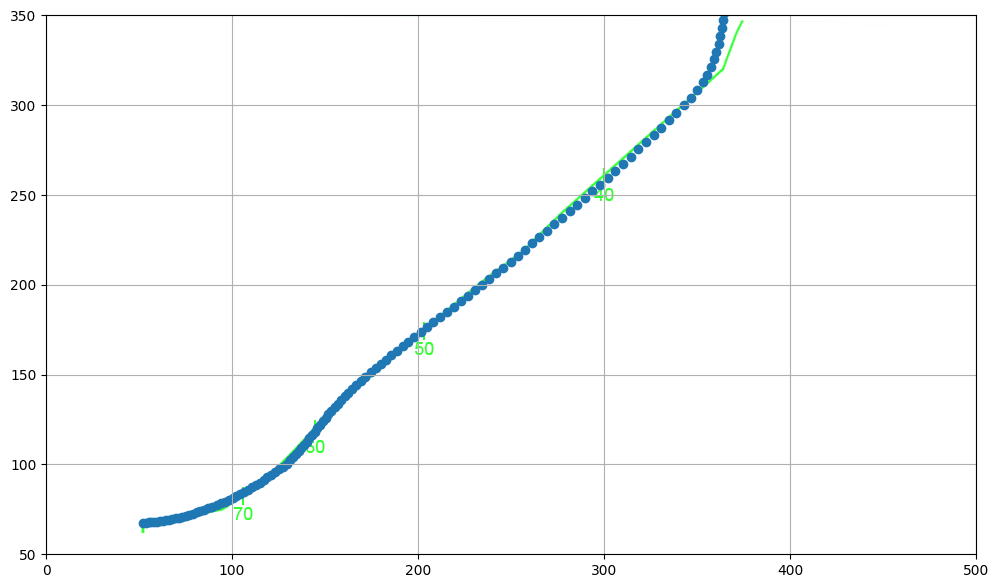

In [9]:
traj_disp(1, data)

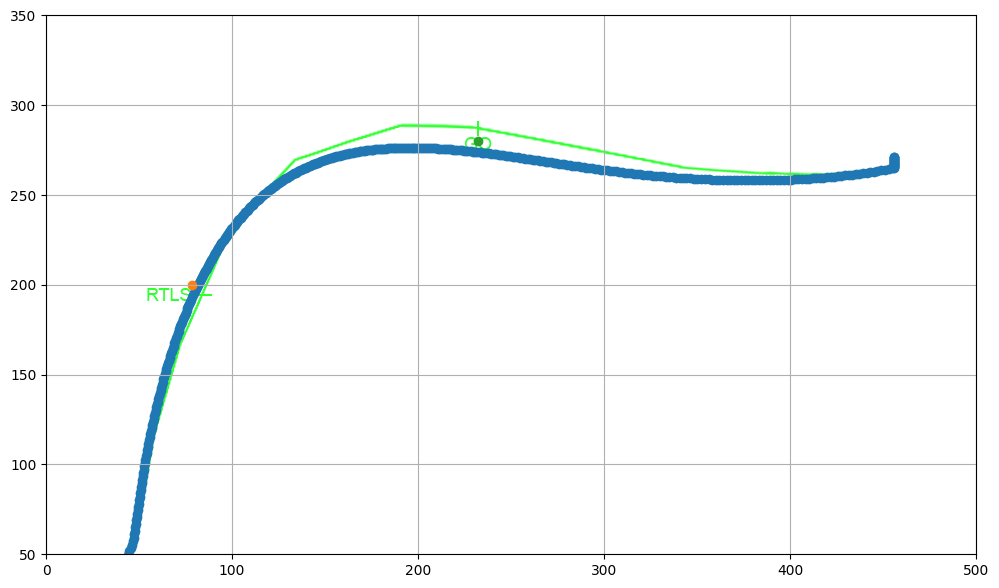

In [10]:
traj_disp(2, data)

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
traj_lines = np.array([
    [5400.0, 160000.0],
    [6000.0, 220000.0],
    [7000.0, 280000.0],
    [8000.0, 310000.0],
    [9000.0, 333000.0],
    [12000.0, 350000.0],
    [14000.0, 350000.0],
    [16000.0, 345000.0],
    [18000.0, 340000.0],
    [20000.0, 335000.0],
    [22000.0, 335000.0],
    [24000.0, 337000.0],
    [25000.0, 340000.0],
    [25800.0, 343000.0]
])
        
traj_lines[:,0] = traj_x_convert(2, traj_lines[:,0])
traj_lines[:,1] = traj_y_convert(2, traj_lines[:,1])

print(traj_lines)

[[ 2.99233007e+02 -4.18335438e+05]
 [ 3.37628209e+02 -5.75406718e+05]
 [ 4.01620212e+02 -7.32477999e+05]
 [ 4.65612215e+02 -8.11013639e+05]
 [ 5.29604218e+02 -8.71224296e+05]
 [ 7.21580227e+02 -9.15727825e+05]
 [ 8.49564233e+02 -9.15727825e+05]
 [ 9.77548239e+02 -9.02638552e+05]
 [ 1.10553225e+03 -8.89549279e+05]
 [ 1.23351625e+03 -8.76460005e+05]
 [ 1.36150026e+03 -8.76460005e+05]
 [ 1.48948426e+03 -8.81695715e+05]
 [ 1.55347627e+03 -8.89549279e+05]
 [ 1.60466987e+03 -8.97402843e+05]]
